In [1]:
from modularity_based import *
from spectral import *
from statistical import *

import igraph as ig 
import networkx as nx

%matplotlib inline

In [2]:
# Simple graph examples using igraph
ER = ig.Graph.Erdos_Renyi(n=100, p=0.5)
G1 = ig.Graph.Famous('Zachary')

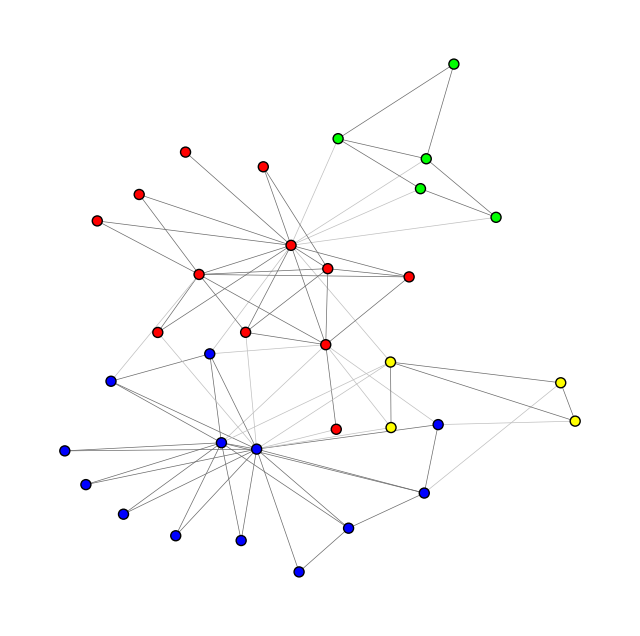

In [3]:
# Using only the igraph library
clusters_louv = louvain(G=G1)

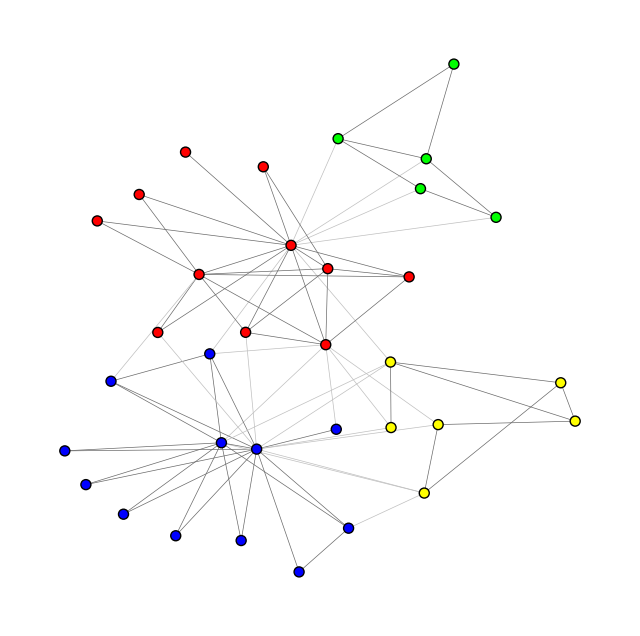

In [4]:
clusters_leid = leiden(G=G1)

In [5]:
# Simple graph examples using networkx
G = nx.karate_club_graph() 

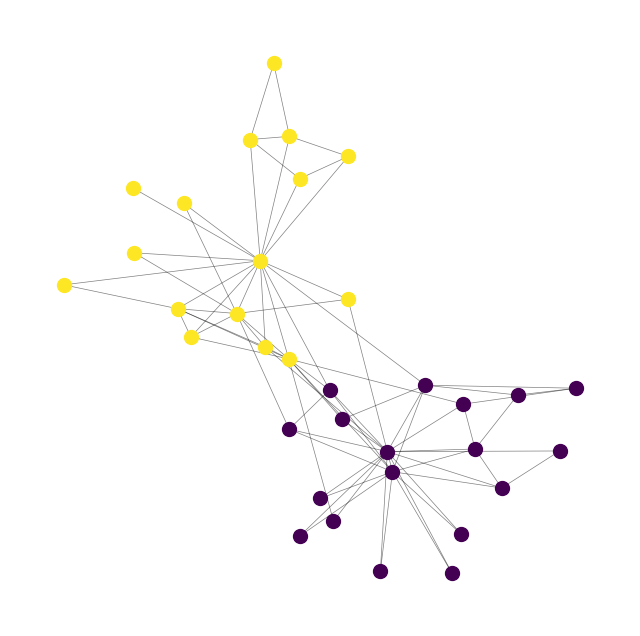

In [6]:
clusters_spec = spectral(G, 2)

**--> Use CDlib to convert igraph object into networkx object and vice-versa**

--> Look more into CDlib for community-detection


In [7]:
## Implement Bayesian Inference
## Generate graph sbm fixer une des probas et varier l'autre pour comparer 
## adjusted_mutual_info_learn
## adjusted_rand_score
## matthews_corrcoefs

In [8]:
import graph_tool.all as gt

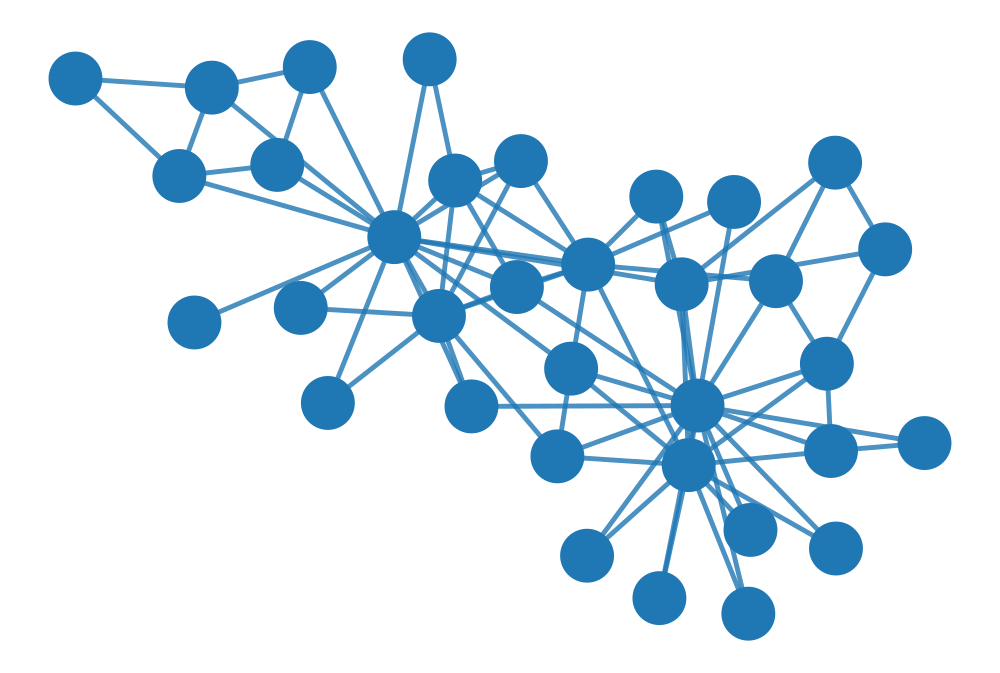

Number of inferred clusters: 1


In [11]:
#G = gt.random_graph(100, lambda: 0.5, directed=False)
G = gt.collection.data["karate"]
state, clusters = bayesianInf(G)